### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
print("Percentage of missing values per column:\n", missing_percentage)

# Identify Outliers
# Use box plots to identify outliers for numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Summary of Data Types
# Get a summary of data types and missing values
data_summary = data.info()
print("Data Types and Missing Values Summary:\n", data_summary)

Missing values per column:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
Percentage of missing values per column:
 destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
t

3. Decide what to do about your missing data -- drop, replace, other...

In [15]:
# 99percent of car data is missing - Lets's drop it.
# Replace missing values with mode
data = data.drop(columns=['car'])
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [16]:
# age is type object, which could create problems, best to convert it to int64
# check unique values and counts for column age
data["age"].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [18]:
# Replace '50plus' with a suitable numeric representation (e.g., 55)
data['age'] = np.where(data['age'] == '50plus', 55, data['age'])

# Convert 'below21' to 18 which is a common legal age and  convert all other ages to integers
data['age'] = np.where(data['age'] == 'below21', 18, data['age']).astype(int)

# check age column again for unique values & counts
print(data["age"].dtype)
data["age"].value_counts()

int64


age
21    2653
26    2559
31    2039
55    1788
36    1319
41    1093
46     686
18     547
Name: count, dtype: int64

In [19]:
# Define the mapping dictionary for income column
income_mapping = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

# Map the income categories to numeric values
data['income'] = data['income'].map(income_mapping)

# Display unique values in the 'income' column to verify the mapping
print(data['income'].unique())
print(data['income'].dtype)
data['income'].value_counts()

[3 5 1 6 4 2 8 7 0]
int64


income
2    2013
1    1831
3    1805
8    1736
4    1659
0    1042
7     895
6     857
5     846
Name: count, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [20]:
#The proportion/percentage of the total observations chose to accept the coupon is 56.84
(data[data['Y'] == 1].shape[0] / data['Y'].shape[0]) * 100

56.84326710816777

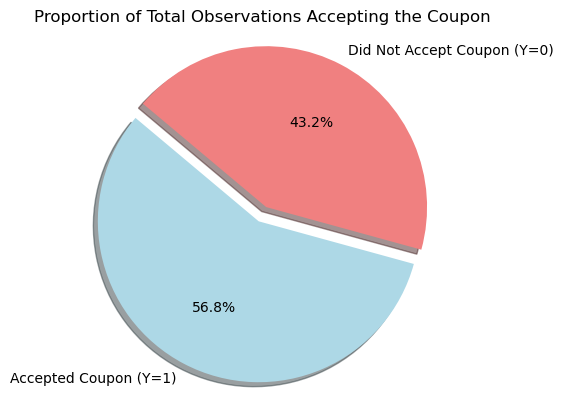

In [21]:
# Calculate how many accepted the coupon and how many didn't
proportion_accepted = data[data['Y'] == 1].shape[0] 
proportion_not_accepted = data[data['Y'] == 0].shape[0] 

# Pie chart for visualization
labels = ['Accepted Coupon (Y=1)', 'Did Not Accept Coupon (Y=0)']
sizes = [proportion_accepted, proportion_not_accepted]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Total Observations Accepting the Coupon')
plt.show()

In [26]:
print(data.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                      int64
maritalStatus           object
has_children             int64
education               object
occupation              object
income                   int64
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [48]:
# Check the data and value counts
data['Bar'].value_counts()

Bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

5. Use a bar plot to visualize the `coupon` column.

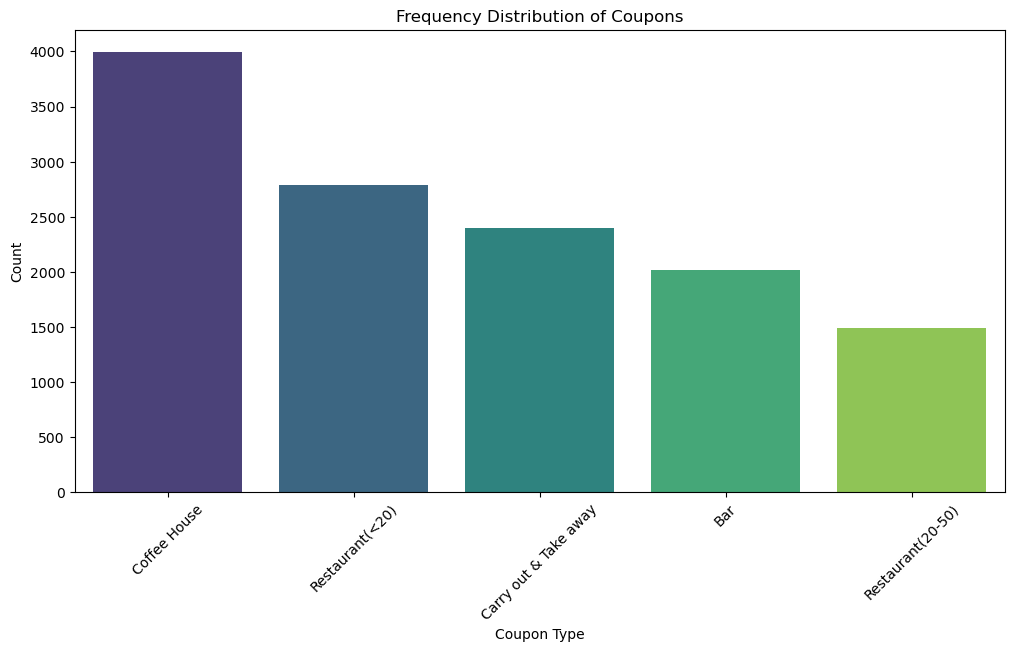

In [49]:
# Convert the 'coupon' column to string 
data['coupon'] = data['coupon'].astype(str)
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='coupon', palette='viridis', order=data['coupon'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Frequency Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.


Summary statistics for the 'temperature' column:


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


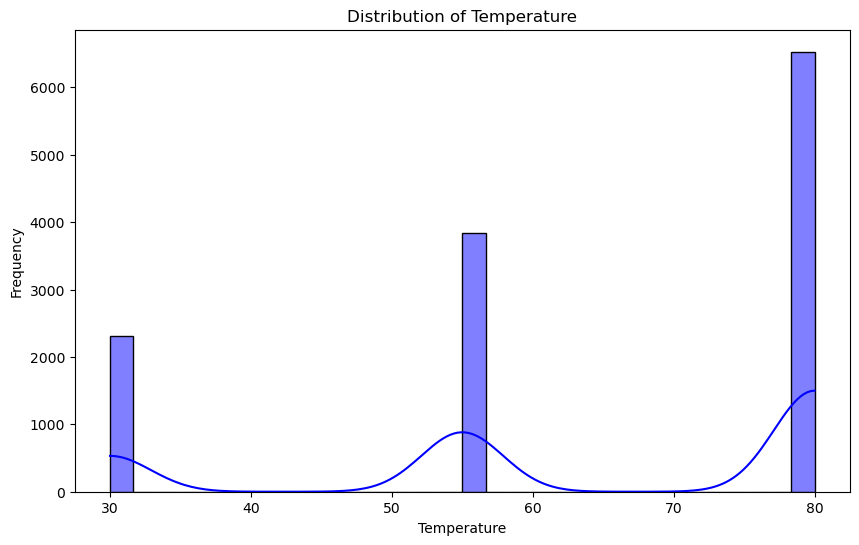

In [50]:
# Check the 'temperature' column
print("\nSummary statistics for the 'temperature' column:")
data['temperature'].describe()

# Create the histogram with additional customization
plt.figure(figsize=(10, 6))
sns.histplot(data['temperature'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [55]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [57]:

# Filter the DataFrame to include only rows where the coupon is 'bar'
bar_coupons = data[data['coupon'] == 'Bar']

# Display info about the new DataFrame
print("\nNew DataFrame with only 'bar' coupons info:")
print(bar_coupons.info())


New DataFrame with only 'bar' coupons info:
<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   int64 
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   int64 
 14  Bar                   2017 non-null   object
 1

In [58]:
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [59]:
total_bar_coupons = len(bar_coupons)

# Number of accepted 'bar' coupons (Y == 1)
accepted_bar_coupons = len(bar_coupons[bar_coupons['Y'] == 1])

# Proportion of accepted 'bar' coupons
proportion_accepted = accepted_bar_coupons / total_bar_coupons

# Display the results
print(f"Total number of 'bar' coupons: {total_bar_coupons}")
print(f"Number of accepted 'bar' coupons: {accepted_bar_coupons}")
print(f"Proportion of accepted 'bar' coupons: {proportion_accepted:.2f}")

Total number of 'bar' coupons: 2017
Number of accepted 'bar' coupons: 827
Proportion of accepted 'bar' coupons: 0.41


In [63]:
bar_coupons['Bar'].value_counts()

Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64

In [64]:
# Define the mapping from categorical to numerical values
bar_mapping = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}

# Apply the mapping to the 'Bar' column
bar_coupons['Bar'] = bar_coupons['Bar'].map(bar_mapping)

# Display updated dataset info and unique values in 'Bar' column
print("\nUpdated dataset info:")
print(bar_coupons.info())
print("\nUnique values in 'Bar' column after conversion:")
print(bar_coupons['Bar'].value_counts())

# Display the first few rows of the updated DataFrame
print("\nFirst few rows of the updated DataFrame:")
print(data.head())


Updated dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   int64 
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   int64 
 14  Bar                   2017 non-null   int64 
 15  CoffeeHouse        

/var/folders/t4/9mx16sps4dj1sqdw_xpqfhk80000gn/T/ipykernel_42139/3857486777.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['Bar'] = bar_coupons['Bar'].map(bar_mapping)


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [65]:

# Categorize customers based on bar visits
low_freq_visitors = bar_coupons[bar_coupons['Bar'] <= 3]
high_freq_visitors = bar_coupons[bar_coupons['Bar'] > 3]

# Calculate the total and accepted coupons for low frequency visitors
total_low_freq = len(low_freq_visitors)
accepted_low_freq = len(low_freq_visitors[low_freq_visitors['Y'] == 1])
if total_low_freq == 0:
    proportion_accepted_low_freq = 0
else:
    proportion_accepted_low_freq = accepted_low_freq / total_low_freq

# Calculate the total and accepted coupons for high frequency visitors
total_high_freq = len(high_freq_visitors)
accepted_high_freq = len(high_freq_visitors[high_freq_visitors['Y'] == 1])
if total_high_freq == 0:
    proportion_accepted_high_freq = 0
else:
    proportion_accepted_high_freq = accepted_high_freq / total_high_freq

# Display the results
print(f"Low frequency visitors (<= 3 times/month):")
print(f"Total number of 'bar' coupons: {total_low_freq}")
print(f"Number of accepted 'bar' coupons: {accepted_low_freq}")
print(f"Proportion of accepted 'bar' coupons: {proportion_accepted_low_freq:.2f}")

print("\nHigh frequency visitors (> 3 times/month):")
print(f"Total number of 'bar' coupons: {total_high_freq}")
print(f"Number of accepted 'bar' coupons: {accepted_high_freq}")
print(f"Proportion of accepted 'bar' coupons: {proportion_accepted_high_freq:.2f}")

Low frequency visitors (<= 3 times/month):
Total number of 'bar' coupons: 1818
Number of accepted 'bar' coupons: 674
Proportion of accepted 'bar' coupons: 0.37

High frequency visitors (> 3 times/month):
Total number of 'bar' coupons: 199
Number of accepted 'bar' coupons: 153
Proportion of accepted 'bar' coupons: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [66]:
# Define the two groups
group1 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25)]
group2 = bar_coupons[~((bar_coupons['Bar'] > 1) & (bar_coupons['age'] > 25))]

# Calculate acceptance rates for Group 1
total_group1 = len(group1)
accepted_group1 = len(group1[group1['Y'] == 1])
if total_group1 == 0:
    proportion_accepted_group1 = 0
else:
    proportion_accepted_group1 = accepted_group1 / total_group1

# Calculate acceptance rates for Group 2
total_group2 = len(group2)
accepted_group2 = len(group2[group2['Y'] == 1])
if total_group2 == 0:
    proportion_accepted_group2 = 0
else:
    proportion_accepted_group2 = accepted_group2 / total_group2

# Display the results
print(f"Group 1 (Drivers who go to a bar > once/month and are > 25 years old):")
print(f"Total number of 'bar' coupons: {total_group1}")
print(f"Number of accepted 'bar' coupons: {accepted_group1}")
print(f"Proportion of accepted 'bar' coupons: {proportion_accepted_group1:.2f}")

print("\nGroup 2 (All other drivers):")
print(f"Total number of 'bar' coupons: {total_group2}")
print(f"Number of accepted 'bar' coupons: {accepted_group2}")
print(f"Proportion of accepted 'bar' coupons: {proportion_accepted_group2:.2f}")

Group 1 (Drivers who go to a bar > once/month and are > 25 years old):
Total number of 'bar' coupons: 420
Number of accepted 'bar' coupons: 292
Proportion of accepted 'bar' coupons: 0.70

Group 2 (All other drivers):
Total number of 'bar' coupons: 1597
Number of accepted 'bar' coupons: 535
Proportion of accepted 'bar' coupons: 0.34


In [80]:
# bar_coupons['passanger'] = bar_coupons['passanger'].str.replace(r'\(s\)', '', regex=True).str.strip()
# Clean the 'passenger' column by removing '(s)'
data.loc[:, 'passanger'] = data['passanger'].str.replace(r'\(s\)', '', regex=True).str.strip()
bar_coupons['passanger'].value_counts()

passanger
Alone      1200
Friend      337
Partner     274
Kid         206
Name: count, dtype: int64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [76]:
excluded_occupations = ['farming', 'fishing', 'forestry']
group1 = bar_coupons.loc[(bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'kid') & (~bar_coupons['occupation'].isin(excluded_occupations))]
group2 = bar_coupons.loc[~((bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'kid') & (~bar_coupons['occupation'].isin(excluded_occupations)))]

# Calculate acceptance rates for Group 1
total_group1 = len(group1)
accepted_group1 = len(group1[group1['Y'] == 1])
if total_group1 == 0:
    proportion_accepted_group1 = 0
else:
    proportion_accepted_group1 = accepted_group1 / total_group1

# Calculate acceptance rates for Group 2
total_group2 = len(group2)
accepted_group2 = len(group2[group2['Y'] == 1])
if total_group2 == 0:
    proportion_accepted_group2 = 0
else:
    proportion_accepted_group2 = accepted_group2 / total_group2

# Display the results
print(f"Group 1 (Drivers who go to a bar > once/month, with no kid passengers, and occupations other than farming, fishing, or forestry):")
print(f"Total number of 'bar' coupons: {total_group1}")
print(f"Number of accepted 'bar' coupons: {accepted_group1}")
print(f"Proportion of accepted 'bar' coupons: {proportion_accepted_group1:.2f}")

print("\nGroup 2 (All other drivers):")
print(f"Total number of 'bar' coupons: {total_group2}")
print(f"Number of accepted 'bar' coupons: {accepted_group2}")
print(f"Proportion of accepted 'bar' coupons: {proportion_accepted_group2:.2f}")

Group 1 (Drivers who go to a bar > once/month, with no kid passengers, and occupations other than farming, fishing, or forestry):
Total number of 'bar' coupons: 596
Number of accepted 'bar' coupons: 410
Proportion of accepted 'bar' coupons: 0.69

Group 2 (All other drivers):
Total number of 'bar' coupons: 1421
Number of accepted 'bar' coupons: 417
Proportion of accepted 'bar' coupons: 0.29


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [78]:
restaurant_mapping = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 6,
    'gt8': 9
}

#bar_coupons['RestaurantLessThan20'] = bar_coupons['RestaurantLessThan20'].map(restaurant_mapping)
data.loc[:, 'RestaurantLessThan20'] = data['RestaurantLessThan20'].map(restaurant_mapping)

# Define the groups
group1 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['passanger'] != 'kid') & (bar_coupons['maritalStatus'] != 'Widowed')]
group2 = bar_coupons[(bar_coupons['Bar'] > 1) & (bar_coupons['age'] < 30)]
group3 = bar_coupons[(bar_coupons['RestaurantLessThan20'] > 3) & (bar_coupons['income'] < 50000)]

# Combine the groups
combined_group = pd.concat([group1, group2, group3]).drop_duplicates()

# Calculate acceptance rates for the combined group
total_combined_group = len(combined_group)
accepted_combined_group = len(combined_group[combined_group['Y'] == 1])
if total_combined_group == 0:
    proportion_accepted_combined_group = 0
else:
    proportion_accepted_combined_group = accepted_combined_group / total_combined_group

# Calculate acceptance rates for the rest of the data
remaining_group = data[~data.index.isin(combined_group.index)]
total_remaining_group = len(remaining_group)
accepted_remaining_group = len(remaining_group[remaining_group['Y'] == 1])
if total_remaining_group == 0:
    proportion_accepted_remaining_group = 0
else:
    proportion_accepted_remaining_group = accepted_remaining_group / total_remaining_group

# Display the results
print(f"Combined Group (Drivers who fit at least one of the criteria):")
print(f"Total number of 'bar' coupons: {total_combined_group}")
print(f"Number of accepted 'bar' coupons: {accepted_combined_group}")
print(f"Proportion of accepted 'bar' coupons: {proportion_accepted_combined_group:.2f}")

print("\nRemaining Group (All other drivers):")
print(f"Total number of 'bar' coupons: {total_remaining_group}")
print(f"Number of accepted 'bar' coupons: {accepted_remaining_group}")
print(f"Proportion of accepted 'bar' coupons: {proportion_accepted_remaining_group:.2f}")

Combined Group (Drivers who fit at least one of the criteria):
Total number of 'bar' coupons: 1057
Number of accepted 'bar' coupons: 530
Proportion of accepted 'bar' coupons: 0.50

Remaining Group (All other drivers):
Total number of 'bar' coupons: 11627
Number of accepted 'bar' coupons: 6680
Proportion of accepted 'bar' coupons: 0.57


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [81]:
# Drivers who frequently visit bars (more than once a month) are more likely to accept bar coupons. 
# This suggests that these drivers have a social and outgoing lifestyle that includes regular visits to bars.

# Drivers under the age of 30 tend to accept bar coupons more often than older drivers. 
# This implies that younger individuals are more receptive to promotional offers related to social activities like going to bars.

#Drivers who are not widowed and who typically have passengers that are not kids are more likely to accept bar coupons. 
# This may indicate that these drivers engage in social activities with adults and are therefore more inclined to utilize bar coupons.

#Drivers who visit cheap restaurants more than four times a month and have an income of less than 50K are also likely to accept bar coupons. 
#This suggests that budget-conscious drivers who seek value in their dining options are receptive to bar coupons as an affordable social option.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [85]:

# Clean the 'passenger' column by removing '(s)'
data['passanger'] = data['passanger'].str.replace(r'\(s\)', '', regex=True).str.strip()

# Convert the 'RestaurantLessThan20' column to numerical values
restaurant_mapping = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].map(restaurant_mapping)

# Define the groups
accepted_restaurant_coupons = data[data['Y'] == 1]
not_accepted_restaurant_coupons = data[data['Y'] == 0]

# Analyze characteristics of those who accepted the coupons
accepted_stats = accepted_restaurant_coupons.describe(include='all')
not_accepted_stats = not_accepted_restaurant_coupons.describe(include='all')

# Display summary statistics
print("Summary statistics for those who accepted the 'RestaurantLessThan20' coupons:")
print(accepted_stats)

print("\nSummary statistics for those who did not accept the 'RestaurantLessThan20' coupons:")
print(not_accepted_stats)



Summary statistics for those who accepted the 'RestaurantLessThan20' coupons:
            destination passanger weather  temperature  time        coupon  \
count              7210      7210    7210  7210.000000  7210          7210   
unique                3         4       3          NaN     5             5   
top     No Urgent Place     Alone   Sunny          NaN   6PM  Coffee House   
freq               3982      3841    5989          NaN  1888          1995   
mean                NaN       NaN     NaN    64.323856   NaN           NaN   
std                 NaN       NaN     NaN    18.959363   NaN           NaN   
min                 NaN       NaN     NaN    30.000000   NaN           NaN   
25%                 NaN       NaN     NaN    55.000000   NaN           NaN   
50%                 NaN       NaN     NaN    80.000000   NaN           NaN   
75%                 NaN       NaN     NaN    80.000000   NaN           NaN   
max                 NaN       NaN     NaN    80.000000   NaN    

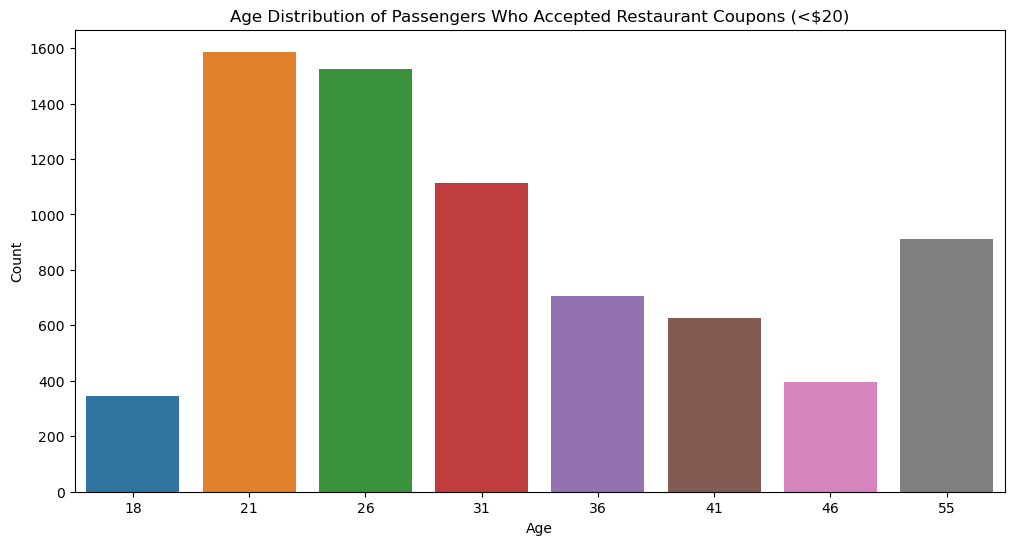

In [86]:
# Compare distributions using visualizations
plt.figure(figsize=(12, 6))
sns.countplot(data=accepted_restaurant_coupons, x='age')
plt.title('Age Distribution of Passengers Who Accepted Restaurant Coupons (<$20)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



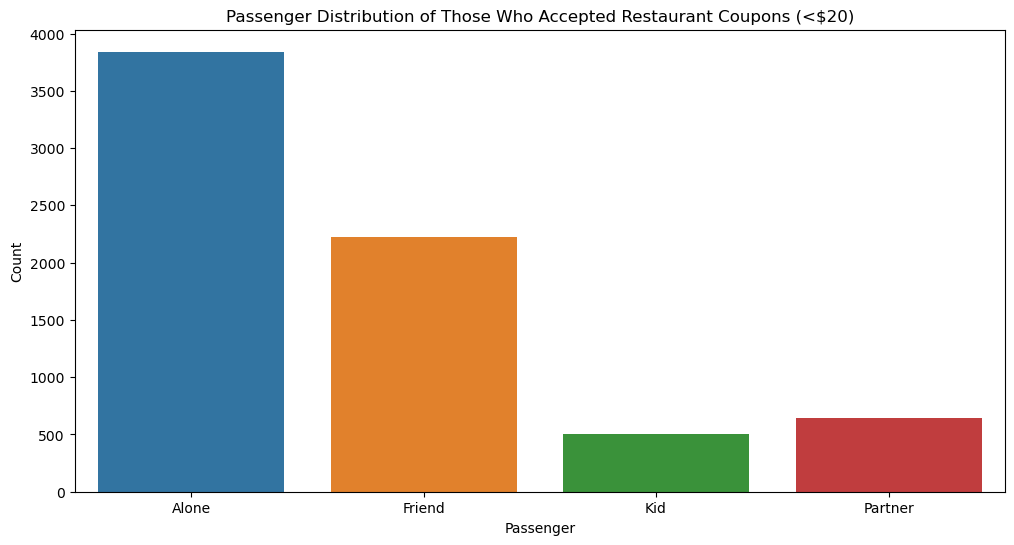

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accepted_restaurant_coupons, x='passanger')
plt.title('Passenger Distribution of Those Who Accepted Restaurant Coupons (<$20)')
plt.xlabel('Passenger')
plt.ylabel('Count')
plt.show()


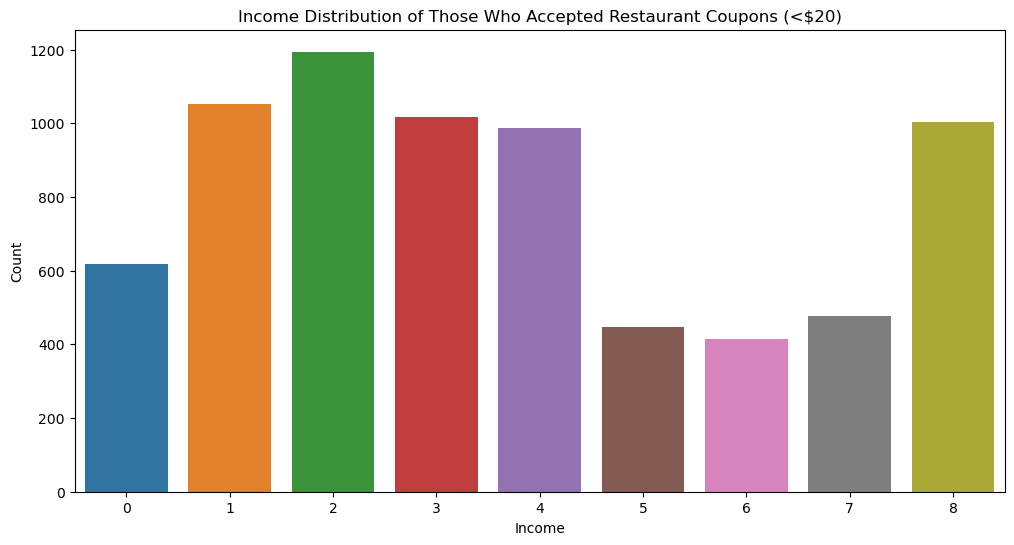

In [88]:

plt.figure(figsize=(12, 6))
sns.countplot(data=accepted_restaurant_coupons, x='income')
plt.title('Income Distribution of Those Who Accepted Restaurant Coupons (<$20)')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()



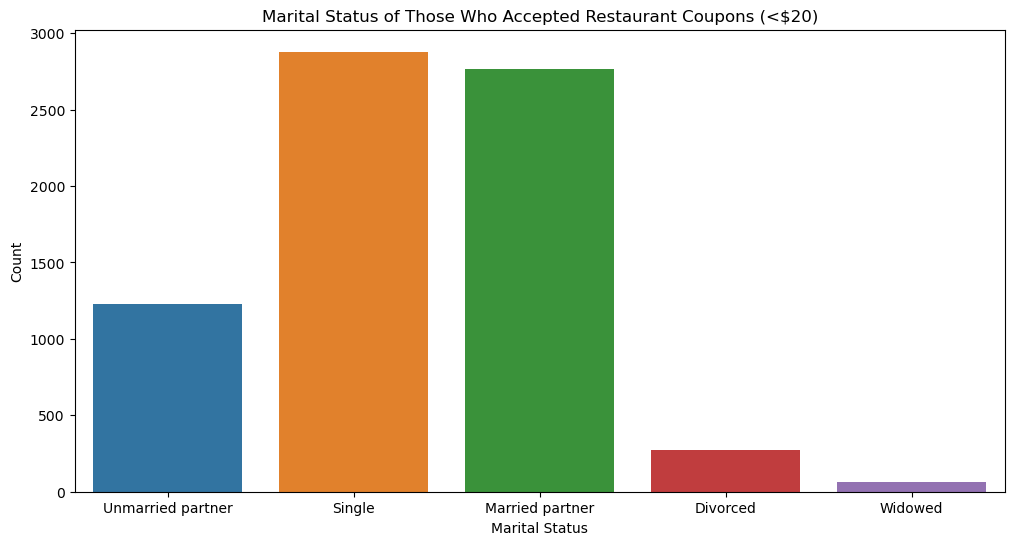

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(data=accepted_restaurant_coupons, x='maritalStatus')
plt.title('Marital Status of Those Who Accepted Restaurant Coupons (<$20)')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()
